In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import LSTM, Dense, Dropout
import yfinance as yf
from keras import Sequential

In [8]:
# Step 1: Data Collection - Download stock data from Yahoo Finance
stock_symbol = 'SMCI'  # Example: Apple Inc.
start_date = '2023-01-01'
end_date = '2024-12-31'

data = yf.download(stock_symbol, start=start_date, end=end_date)
data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SMCI,SMCI,SMCI,SMCI,SMCI
Date,,,,,
2023-01-03,8.386000,8.525000,8.194000,8.308000,8152000
2023-01-04,8.225000,8.774000,8.206000,8.461000,14496000
2023-01-05,8.025000,8.156000,7.963000,8.152000,10978000
2023-01-06,8.439000,8.512000,8.053000,8.145000,10331000
2023-01-09,8.477000,9.280000,8.466000,8.595000,26216000
...,...,...,...,...,...
2024-12-23,32.400002,32.590000,31.580000,31.820000,26032300
2024-12-24,34.330002,35.500000,32.189999,32.299999,41339700


In [9]:
# Step 2: Preprocessing the data
# Use 'Close' prices for prediction
data = data[['Close']]

# Normalize the data to the range [0, 1] using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [10]:
import ta

# Ensure 'Close' is a pandas Series (just in case)
close_prices = data['Close'].iloc[:, 0]  # This guarantees it's a Series

# Calculate the RSI (Relative Strength Index)
rsi = ta.momentum.RSIIndicator(close_prices, window=10).rsi()
data['RSI'] = rsi

# Print the RSI values
print(rsi)
data.head(20)

Date
2023-01-03          NaN
2023-01-04          NaN
2023-01-05          NaN
2023-01-06          NaN
2023-01-09          NaN
                ...    
2024-12-23    42.532254
2024-12-24    48.784005
2024-12-26    47.045608
2024-12-27    42.075978
2024-12-30    38.719227
Name: rsi, Length: 501, dtype: float64


C:\Users\17yuv\AppData\Local\Temp\ipykernel_3496\3044499015.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RSI'] = rsi


Price,Close,RSI
Ticker,SMCI,
Date,,
2023-01-03,8.386,NaN
2023-01-04,8.225,NaN
2023-01-05,8.025,NaN
2023-01-06,8.439,NaN
2023-01-09,8.477,NaN
2023-01-10,7.837,NaN
2023-01-11,7.561,NaN
2023-01-12,8.045,NaN


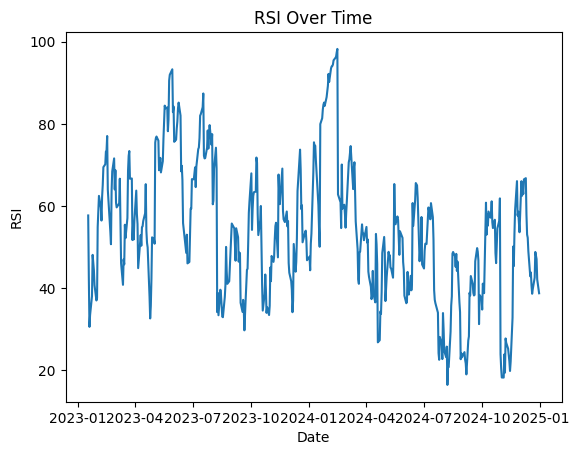

In [11]:
# Reset index to move 'Date' from index to a column
data_reset = data.reset_index()

# Now you can access 'Date' as a column
plt.plot(data_reset['Date'], data_reset['RSI'])
plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('RSI Over Time')
plt.show()


C:\Users\17yuv\AppData\Local\Temp\ipykernel_3496\3090574113.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lband'] = bol.bollinger_lband()
C:\Users\17yuv\AppData\Local\Temp\ipykernel_3496\3090574113.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hband'] = bol.bollinger_hband()


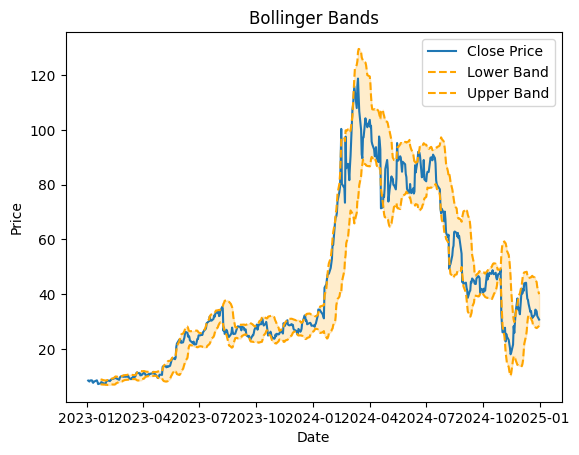

In [12]:
import ta
import matplotlib.pyplot as plt

# Ensure 'Close' is a pandas Series
close_prices = data['Close'].squeeze()  # .squeeze() ensures it's 1D

# Calculate Bollinger Bands
bol = ta.volatility.BollingerBands(close_prices, window=14)

# Add the bands to the data
data['lband'] = bol.bollinger_lband()
data['hband'] = bol.bollinger_hband()

# Reset the index to access 'Date' column
data_reset = data.reset_index()

# Plot the Close, lower band, and upper band
plt.plot(data_reset['Date'], data_reset['Close'], label='Close Price')
plt.plot(data_reset['Date'], data_reset['lband'], label='Lower Band', linestyle='--', color="orange")
plt.plot(data_reset['Date'], data_reset['hband'], label='Upper Band', linestyle='--', color="orange")
plt.fill_between(data_reset['Date'], data_reset['lband'], data_reset['hband'], alpha=0.2, color="orange")
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bollinger Bands')
plt.legend()

# Save the figure first, before showing it
plt.savefig('BollingerBands.png')

# Show the plot
plt.show()


In [18]:
import ta
import matplotlib.pyplot as plt

# Ensure 'Close' is a pandas Series
close_prices = data['Close'].squeeze()  # .squeeze() ensures it's 1D

data['DLR'] = ta.others.DailyLogReturnIndicator(close_prices).daily_log_return()
data_reset = data.reset_index()

plt.plot(data_reset['Date'], data_reset['DLR'], label='Daily Log Return')
plt.show()


In [19]:
# Step 3: Prepare data for LSTM (Create sequences)
train_size = int(len(scaled_data) * 0.8)  # Use 80% for training
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Function to create sequences for LSTM
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data) - 1):  # Change to len(data) - 1 for next-day prediction
        X.append(data[i-time_step:i, 0])
        y.append(data[i+1, 0])  # Target is the next day's price
    return np.array(X), np.array(y)

# Create training and testing datasets
X_train, y_train = create_sequences(train_data)
X_test, y_test = create_sequences(test_data)

# Reshape the input data to be in the shape (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [20]:
# Step 4: Build the LSTM model
model = Sequential()

# Adding LSTM layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

C:\workplace\stock_prediction_using_ANN\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
# Step 5: Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0059
Epoch 2/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 6.0985e-04
Epoch 3/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 4.4467e-04
Epoch 4/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 3.9962e-04
Epoch 5/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 4.2621e-04
Epoch 6/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 4.1917e-04
Epoch 7/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 3.4189e-04
Epoch 8/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 4.0948e-04
Epoch 9/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 3.4656e-04
Epoch 10/10
87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 3.2065e-04


In [22]:
# Step 6: Make predictions
predicted_stock_price = model.predict(X_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [23]:
# Step 7: Inverse transform the predictions and test data
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
real_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

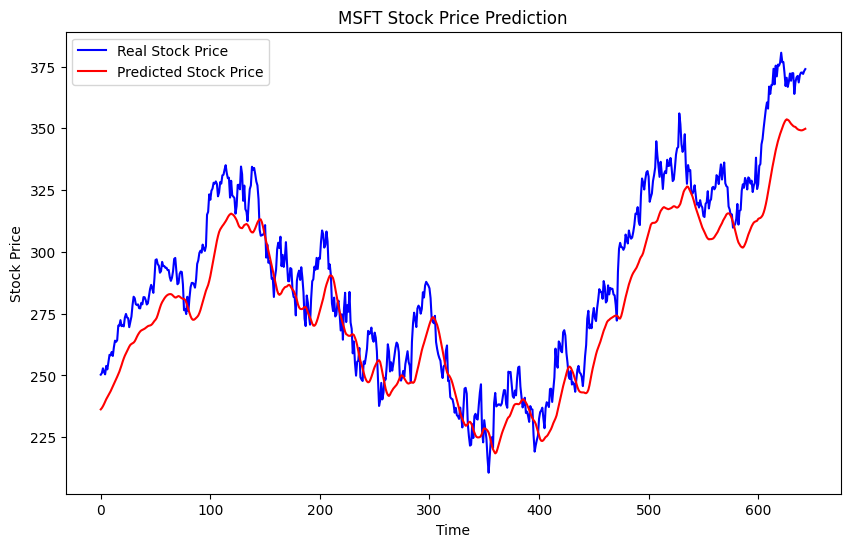

In [24]:
# Step 8: Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(real_stock_price, color='blue', label='Real Stock Price')
plt.plot(predicted_stock_price, color='red', label='Predicted Stock Price')
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()